<a href="https://colab.research.google.com/github/AnasBakr/Deep_Learning_Projects/blob/main/CIFAR10_images_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import dependecies

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow

import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import cifar10
from tensorflow.math import confusion_matrix



---



This is a dataset of 50,000 32x32 color training images and 10,000 test images, labeled over 10 categories




> Add blockquote
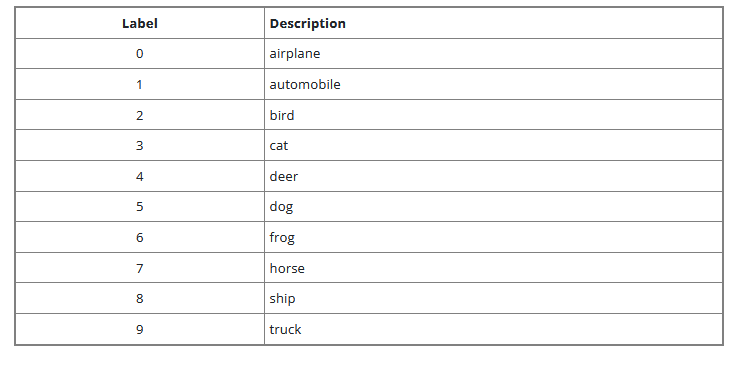


In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

170498071/170498071 [==============================] - 2s 0us/step


In [4]:
type(x_train)

numpy.ndarray


---

* Training data = 50,000 Images

* Test data = 10,000 Images

* Image dimension  --> 32 x 32

---


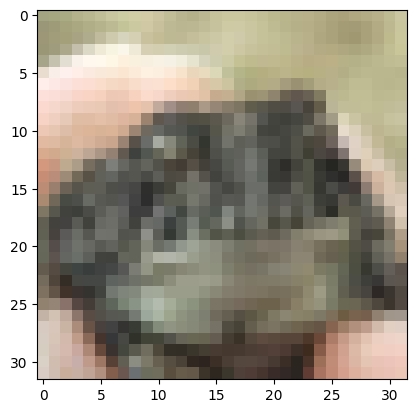

[6]


In [5]:
plt.imshow(x_train[25])
plt.show()

print(y_train[25])



---

Building the Neural Network

In [6]:
model = keras.Sequential([
    keras.layers.Input(shape=(32, 32, 3)),

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [7]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
# training the Neural Network

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 18s 10ms/step - loss: 11.0509 - accuracy: 0.1000
Epoch 2/10
1563/1563 [==============================] - 15s 9ms/step - loss: 11.0571 - accuracy: 0.1000
Epoch 3/10
1563/1563 [==============================] - 12s 8ms/step - loss: 11.0571 - accuracy: 0.1000
Epoch 4/10
1563/1563 [==============================] - 12s 8ms/step - loss: 11.0571 - accuracy: 0.1000
Epoch 5/10
1563/1563 [==============================] - 12s 8ms/step - loss: 11.0571 - accuracy: 0.1000
Epoch 6/10
1563/1563 [==============================] - 15s 9ms/step - loss: 11.0571 - accuracy: 0.1000
Epoch 7/10
1563/1563 [==============================] - 12s 8ms/step - loss: 11.0571 - accuracy: 0.1000
Epoch 8/10
1563/1563 [==============================] - 12s 8ms/step - loss: 11.0571 - accuracy: 0.1000
Epoch 9/10
1563/1563 [==============================] - 11s 7ms/step - loss: 11.0571 - accuracy: 0.1000
Epoch 10/10
1563/1563 [==============================] - 12s 8m

In [9]:
loss, accuracy = model.evaluate(x_test, y_test)
print(accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 11.0571 - accuracy: 0.1000
0.10000000149011612




---



In [10]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(32, 32, 3)),

    tf.keras.layers.Conv2D( filters = 32, kernel_size=(4,4), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides = 2),
    tf.keras.layers.Conv2D( filters = 32, kernel_size=(4,4), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides = 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, )
])

model_1.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])

model_1.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 60s 38ms/step - loss: 2.5387 - accuracy: 0.1276
Epoch 2/10
1563/1563 [==============================] - 58s 37ms/step - loss: 1.8715 - accuracy: 0.3155
Epoch 3/10
1563/1563 [==============================] - 75s 48ms/step - loss: 1.4576 - accuracy: 0.4807
Epoch 4/10
1563/1563 [==============================] - 64s 41ms/step - loss: 1.3038 - accuracy: 0.5442
Epoch 5/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.1878 - accuracy: 0.5838
Epoch 6/10
1563/1563 [==============================] - 58s 37ms/step - loss: 1.1021 - accuracy: 0.6148
Epoch 7/10
1563/1563 [==============================] - 62s 40ms/step - loss: 1.0254 - accuracy: 0.6430
Epoch 8/10
1563/1563 [==============================] - 57s 37ms/step - loss: 0.9551 - accuracy: 0.6689
Epoch 9/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.8783 - accuracy: 0.6945
Epoch 10/10
1563/1563 [==============================] - 57s 37m

Training data accuracy = 73%

---

Accuracy on Test data:


In [22]:
loss, accuracy = model_1.evaluate(x_test, y_test)
print(accuracy)

313/313 [==============================] - 4s 13ms/step - loss: 1.4684 - accuracy: 0.5672
0.5672000050544739


Test data accuracy = 56%

---



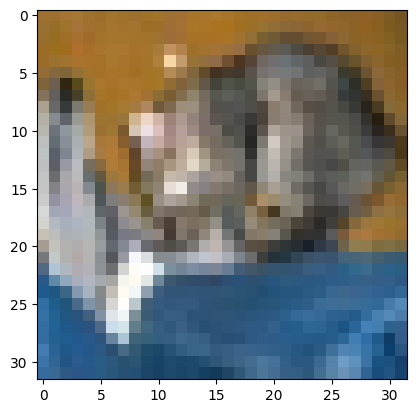

label:  [3]


In [12]:
plt.imshow(x_test[0])
plt.show()

print('label: ',y_test[0])

In [23]:
y_pred = model_1.predict(x_test)

313/313 [==============================] - 5s 16ms/step


In [24]:
label_for_first_test_image = np.argmax(y_pred[0])
print(label_for_first_test_image)

5


In [25]:
# converting the prediction probabilities to class label for all test data points
y_pred_labels = [np.argmax(i) for i in y_pred]




---
Confusin Matrix


In [26]:
conf_mat = confusion_matrix(y_test, y_pred_labels)

Text(0.5, 47.7222222222222, 'Predicted Labels')

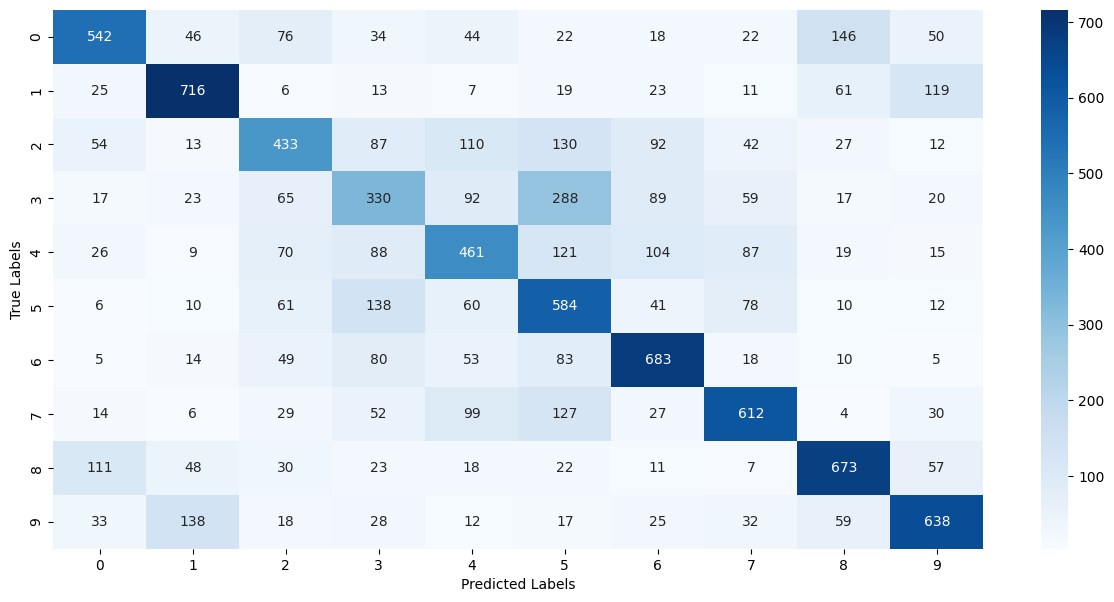

In [34]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')